In [2]:
#Step 1: Install Necessary Packages
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import config

In [3]:
#Load API KEY
API_KEY = config.api_key
print("Key Loaded Succesfully")

Key Loaded Succesfully


In [ ]:
#Creating Parameters, and informing NASDAQ how many rows we wish to pull
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

parameters = {
    'api_key': API_KEY,
    'qopts.per_page': 10000
}

#Storing data pulled into a variable
json_data = requests.get(api_url, params= parameters).json()

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2024-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2024-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

DATA CLEANING

In [ ]:
#Creating a dataframe based on column and row names
data = json_data['datatable']['data']

columns = [col['name'] for col in json_data['datatable']['columns']]

df = pd.DataFrame(data, columns=columns)

#Ensuring reportdate values are in date time format 
df['reportdate'] = pd.to_datetime(df['reportdate'], errors='coerce')
df.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   compnumber     10000 non-null  int64         
 1   reportid       10000 non-null  int64         
 2   mapcode        10000 non-null  int64         
 3   amount         10000 non-null  float64       
 4   reportdate     10000 non-null  datetime64[ns]
 5   reporttype     10000 non-null  object        
 6   auditorstatus  9999 non-null   object        
 7   currency       10000 non-null  object        
 8   consolidated   10000 non-null  object        
 9   longname       10000 non-null  object        
 10  shortname      10000 non-null  object        
 11  status         10000 non-null  object        
 12  countrycode    10000 non-null  object        
 13  region         10000 non-null  object        
 14  cik            10000 non-null  int64         
 15  mic            10000

In [13]:
#Creating a list of necessary columns
necessary_columns = ['reportid', 'reportdate', 'reporttype', 'amount', 'longname', 'country', 'region', 'indicator', 'statement']

#Creating a Data Frame of the necessary Columns
df = df[necessary_columns]
df.head()

,reportid,reportdate,reporttype,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived


In [17]:
#Viewing Country names to make sure I account for everything
df['country'].value_counts()

country
United States of America    3253
Cayman Islands              1556
Japan                       1303
Ireland                     1155
Bahamas                      898
India                        608
Switzerland                  554
Australia                    228
Canada                       106
Brazil                        62
South Korea                   54
United Kingdom                51
France                        33
Chile                         22
Indonesia                     21
Finland                       16
Belgium                       14
Italy                         14
Israel                        12
Hong Kong                     12
Denmark                       12
Germany                        8
Spain                          8
Name: count, dtype: int64

In [15]:
#Creating a dictionary of Country names because I am unfamiliar with the codes
country_mapping = {
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas',
    'IRL': 'Ireland',
    'IND': 'India',
    'AUS': 'Australia',
    'CAN': 'Canada',
    'BRA': 'Brazil',
    'IDN': 'Indonesia',
    'ISR': 'Israel',
    'FIN': 'Finland',
    'CHE': 'Switzerland',
    'KOR': 'South Korea',
    'GBR': 'United Kingdom',
    'FRA': 'France',
    'CHL': 'Chile',
    'BEL': 'Belgium',
    'ITA': 'Italy',
    'HKG': 'Hong Kong',
    'DNK': 'Denmark',
    'ESP': 'Spain'
}

df['country'] = df['country'].replace(country_mapping)
df

C:\Users\era64\AppData\Local\Temp\ipykernel_26452\4023277860.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].replace(country_mapping)


,reportid,reportdate,reporttype,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,1.048195e+01,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754e+00,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,1.078821e+01,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,9.437545e+00,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,8.755041e+00,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
...,...,...,...,...,...,...,...,...,...
9995,1593770752,2014-09-30,Q3,8.060000e+08,Chubb Ltd,Switzerland,Europe,Cash and Equivalents,Balance Sheet
9996,1593770752,2014-09-30,Q3,2.115900e-01,Chubb Ltd,Switzerland,Europe,Total Asset Turnover,Derived
9997,1593770752,2014-09-30,Q3,5.330200e-02,Chubb Ltd,Switzerland,Europe,Revenue to Assets,Derived
9998,1593770752,2014-09-30,Q3,8.051120e-01,Chubb Ltd,Switzerland,Europe,Return on Assets,Derived


In [16]:
#Renaming Columns to Snake case
df.columns = ['report_id','report_date', 'report_type', 'amount', 'company_name', 'country', 'region', 'indicator', 'statement']
df.head()

,report_id,report_date,report_type,amount,company_name,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived


In [19]:
df['indicator'].value_counts()

indicator
EBITDA                                           291
EBITDA Margin                                    289
Total Assets Per Share                           244
Shares Outstanding                               239
Free Cash Flow Per Share                         232
EPS - Net Income - Diluted                       232
Revenue Per Share                                230
EPS - Net Income - Basic                         230
Weighted Average Shares Outstanding - Diluted    228
Weighted Average Shares Outstanding - Basic      227
Cash From Investing                              220
Net Income                                       220
Cash, Beginning of Year                          220
Calculated Tax Rate                              219
Cash, End of Year                                219
Cash From Operations                             219
Total Assets                                     217
Total Revenue                                    217
Net Margin                          

In [20]:
#Creating a Copy of my Data Frame for any transformations I may make
filtered_df = df[df['indicator'] == 'EBITDA Margin'].copy()
filtered_df.head()

,report_id,report_date,report_type,amount,company_name,country,region,indicator,statement
662,1868192512,2011-06-30,A,-1979.328191,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
768,1918804736,2014-06-30,A,-86142.858937,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
817,1935675392,2015-06-30,A,-19363.385060,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
845,1851368960,2010-12-31,A,26.841546,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived
889,1851369024,2010-12-31,Q4,14.403761,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived


In [21]:
#Using describe to do rough analysis
filtered_df.describe()

,report_id,report_date,amount
count,2.890000e+02,289,289.000000
mean,1.747260e+09,2013-06-26 03:59:10.173010432,-353.917085
min,1.504051e+09,2010-12-31 00:00:00,-86142.858937
25%,1.569850e+09,2011-12-31 00:00:00,13.932416
50%,1.868169e+09,2013-06-30 00:00:00,17.234169
75%,1.901958e+09,2014-11-30 00:00:00,26.044164
max,1.952476e+09,2015-12-31 00:00:00,47.410116
std,1.693446e+08,NaN,5191.939353


In [ ]:
#Viewing sorted values due to the outliers seen above
filtered_df.sort_values(by = 'amount')

,report_id,report_date,report_type,amount,company_name,country,region,indicator,statement
768,1918804736,2014-06-30,A,-86142.858937,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
817,1935675392,2015-06-30,A,-19363.385060,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
662,1868192512,2011-06-30,A,-1979.328191,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
2203,1851368960,2010-12-31,A,-26.841528,China Unicom (Hong Kong) Ltd,Hong Kong,Asia Pacific,EBITDA Margin,Derived
2205,1868239616,2011-12-31,A,-22.854944,China Unicom (Hong Kong) Ltd,Hong Kong,Asia Pacific,EBITDA Margin,Derived
...,...,...,...,...,...,...,...,...,...
2048,1868192544,2011-06-30,Q2,43.551968,BCE Inc,Canada,North America,EBITDA Margin,Derived
2054,1885040144,2012-03-31,Q1,43.756366,BCE Inc,Canada,North America,EBITDA Margin,Derived
2045,1868169232,2011-03-31,Q1,44.872369,BCE Inc,Canada,North America,EBITDA Margin,Derived
2058,1885087024,2012-09-30,Q3,45.624247,BCE Inc,Canada,North America,EBITDA Margin,Derived


In [25]:
#Dropping the extreme outlier that is skewing the data
filtered_df = filtered_df[filtered_df['company_name'] != 'Immutep Ltd']
filtered_df.describe()

,report_id,report_date,amount
count,2.860000e+02,286,286.000000
mean,1.745579e+09,2013-06-24 20:28:31.888111872,18.194177
min,1.504051e+09,2010-12-31 00:00:00,-26.841528
25%,1.569850e+09,2012-01-15 00:00:00,14.146726
50%,1.859769e+09,2013-06-29 12:00:00,17.296259
75%,1.901952e+09,2014-11-14 18:00:00,26.055693
max,1.952476e+09,2015-12-31 00:00:00,47.410116
std,1.694033e+08,NaN,13.189965


DATA VISUALIZATION

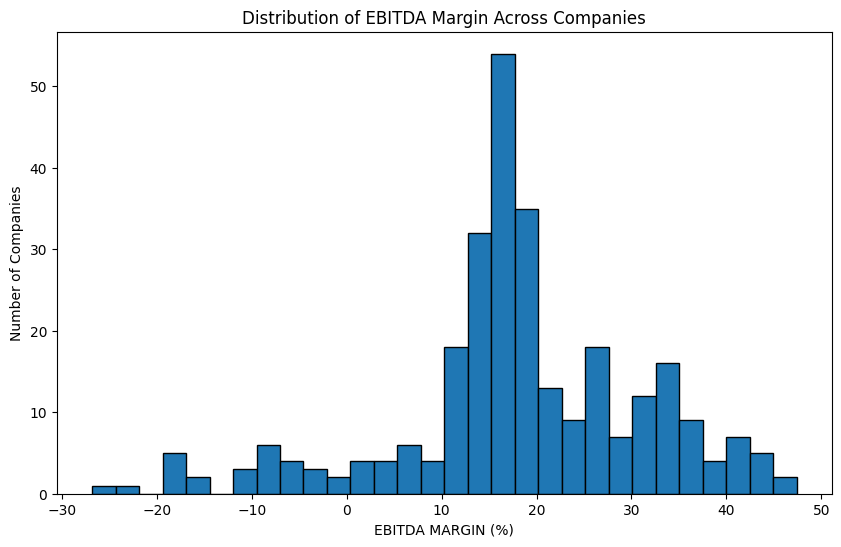

In [ ]:
#Generating Histogram for distribution
plt.figure(figsize=(10,6))
plt.hist(filtered_df['amount'], bins = 30, edgecolor = 'black')
plt.xlabel('EBITDA MARGIN (%)')
plt.ylabel('Number of Companies')
plt.title('Distribution of EBITDA Margin Across Companies')
plt.show()

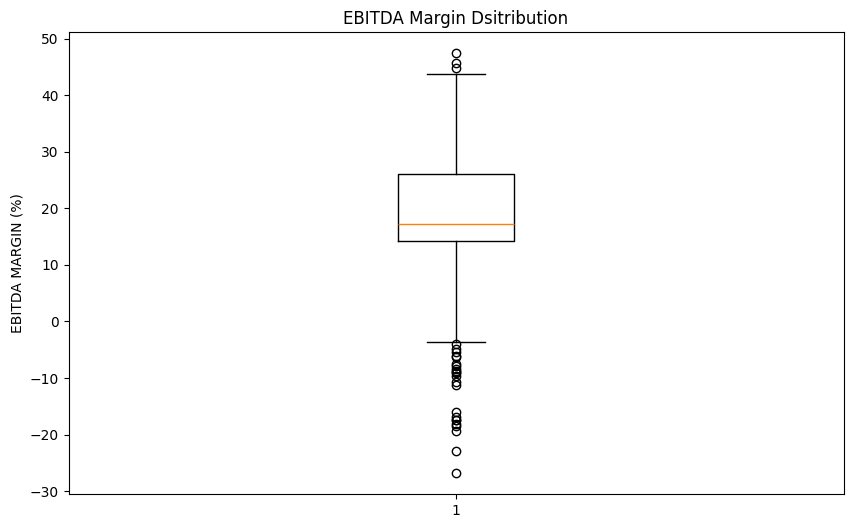

In [30]:
#Creating a boxplot to view more information about the median
plt.figure(figsize=(10,6))
plt.boxplot(filtered_df['amount'])
plt.ylabel('EBITDA MARGIN (%)')
plt.title('EBITDA Margin Dsitribution')
plt.show()

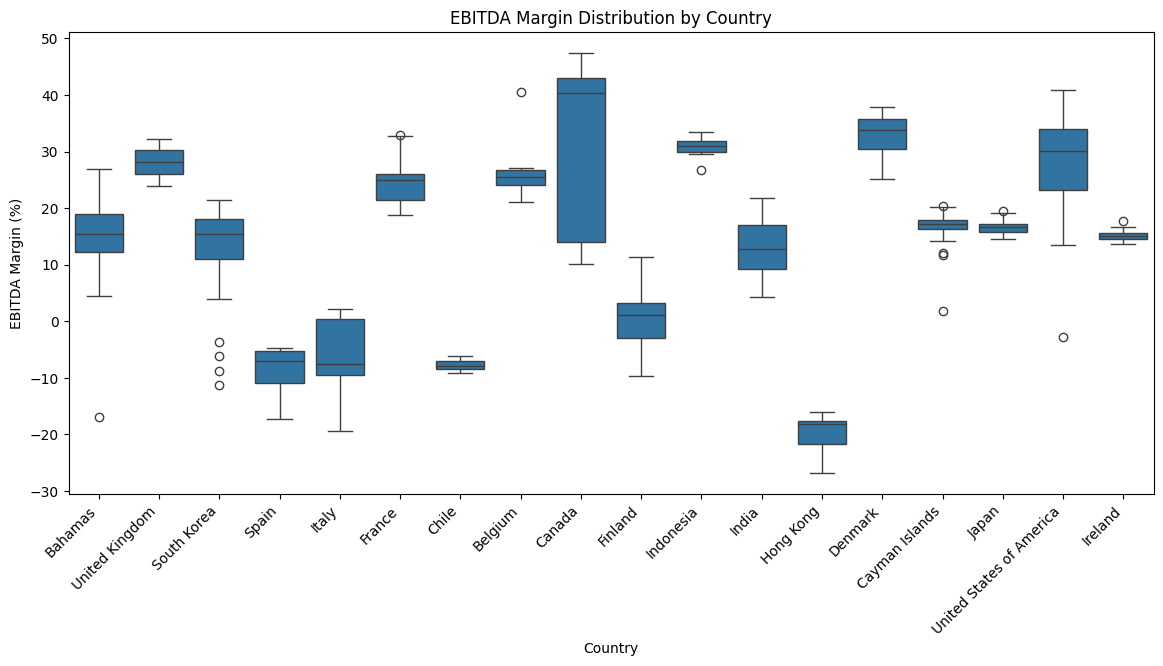

In [33]:
#Seperating Boxplot by Country to see how they Vary
plt.figure(figsize = (14, 6))
sns.boxplot(data = filtered_df, x = 'country', y = 'amount')
plt.xlabel('Country')
plt.ylabel('EBITDA Margin (%)')
plt.title('EBITDA Margin Distribution by Country')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout
plt.show()

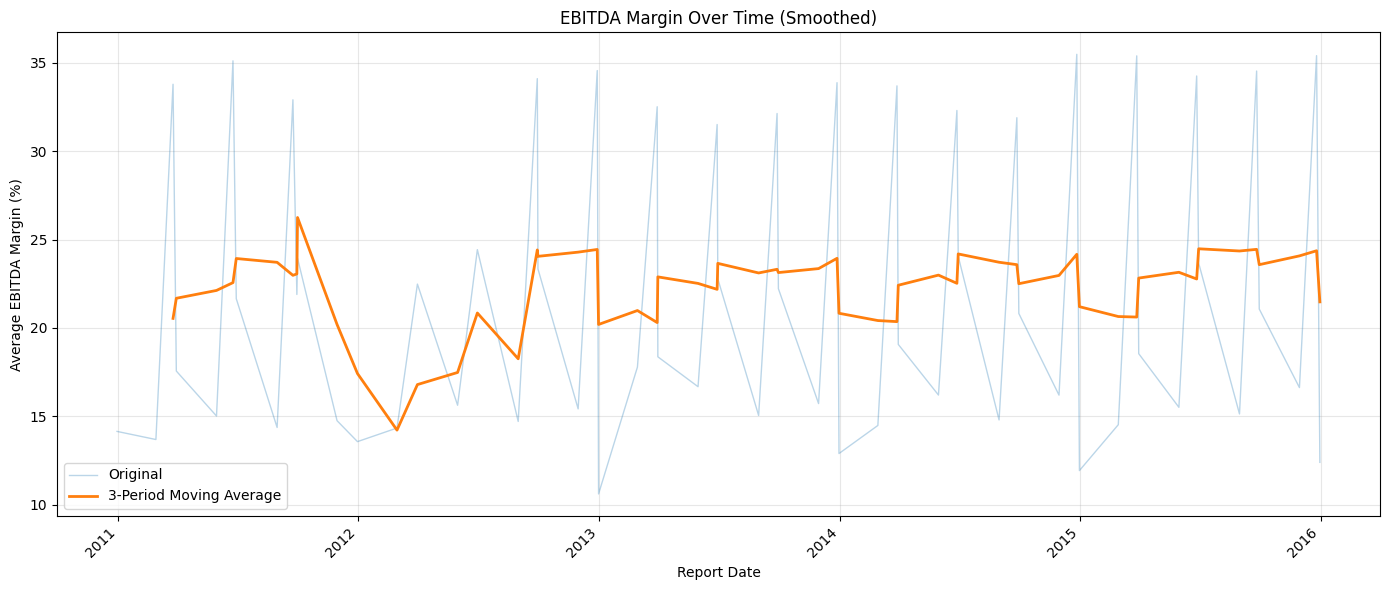

In [38]:
#Viewing the profit margin over time
time_trend = filtered_df.groupby('report_date')['amount'].mean()

fig, ax = plt.subplots(figsize = (14,6))

ax.plot(time_trend.index, time_trend.values, alpha = 0.3, label = 'Original', linewidth = 1)
smoothed = time_trend.rolling(window = 3).mean()
ax.plot(smoothed.index, smoothed.values, label = '3-Period Moving Average', linewidth = 2)

#Adding a Grid to make it easier to parse
ax.set_xlabel('Report Date')
ax.set_ylabel('Average EBITDA Margin (%)')
ax.set_title('EBITDA Margin Over Time (Smoothed)')
ax.legend()
ax.grid(True, alpha = 0.3)


plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()